# Lecture de ROI



## References



Références documentaires : 
* https://imagej.net/User_Guides User guide for ImageJ and Fiji

Packages related to ImageJ
* https://pypi.org/search/?q=ImageJ
* https://pypi.org/project/read-roi/ a package to read .roi zip and files

inspired from 
* https://imagej.nih.gov/ij/developer/source/ij/io/RoiDecoder.java.html
* http://wsr.imagej.net/macros/js/DecodeRoiFile.js

Other :
* https://imagej.net/docs/guide/146-29.html#toc-Section-29 29.3 'Find edges' : une convolution 3x3 toute simple (Sobel)

## Import

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
!pip install read-roi

  Created wheel for read-roi: filename=read_roi-1.5.2-py2.py3-none-any.whl size=6404 sha256=98f9fa535839fdd043e00654dfb685ea55d228786df144409b5488c859d86f4d
  Stored in directory: /root/.cache/pip/wheels/78/2c/ac/b37c1d3e136e45a8939f659cea5e61c865cb03da2634e436f6
Successfully built read-roi


In [0]:
# pour une exécution dans colab : mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Image Loading

In [0]:
# To do : construire IMG_FOLDER à partir d'un ROOT_FOLDER déclaré dans un fichier de config 
IMG_FOLDER = '/content/drive/My Drive/8. JEDHA/Projets/Nath - ROI detection/_GIT_Segmenting-Histology-Images/Data/Images with ROI'
ROI_FOLDER = IMG_FOLDER +'/ROI'

In [0]:
def load_img(img_path):
    img = tf.io.read_file(img_path) 
    img = tf.image.decode_jpeg(img,channels=3)
    return img

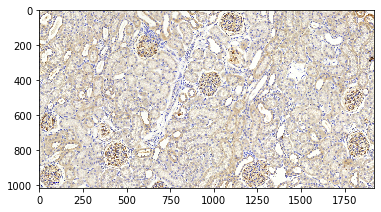

In [0]:
img_name = 'R22 VEGF 2_15.0xC1.jpg'
img_path = IMG_FOLDER+'/'+img_name
img = load_img(img_path)
plt.imshow(img)

In [0]:
img.shape

TensorShape([1018, 1920, 3])

## Import one ROI

NB : we unzipped RoiSetR22C1.zip in the ROI folder to test the loading of a single ROI file

In [0]:
from read_roi import read_roi_file
roi_name = '0075-1108.roi'
roi_path = ROI_FOLDER+'/'+ roi_name 
roi = read_roi_file(roi_path)

In [0]:
roi.items()

dict_items([('0075-1108', {'type': 'freehand', 'x': [1173, 1172, 1169, 1168, 1166, 1164, 1161, 1160, 1158, 1157, 1153, 1152, 1150, 1146, 1138, 1137, 1134, 1133, 1132, 1121, 1121, 1116, 1112, 1110, 1108, 1106, 1100, 1097, 1096, 1093, 1092, 1089, 1088, 1085, 1084, 1084, 1082, 1081, 1080, 1078, 1078, 1077, 1077, 1077, 1076, 1074, 1073, 1072, 1070, 1069, 1068, 1066, 1065, 1064, 1064, 1062, 1058, 1057, 1053, 1053, 1050, 1048, 1046, 1046, 1044, 1042, 1041, 1040, 1037, 1037, 1037, 1037, 1037, 1037, 1037, 1037, 1037, 1036, 1036, 1036, 1036, 1036, 1036, 1037, 1038, 1038, 1042, 1044, 1044, 1045, 1049, 1049, 1050, 1053, 1053, 1053, 1056, 1060, 1061, 1062, 1064, 1068, 1081, 1085, 1086, 1093, 1094, 1108, 1117, 1118, 1120, 1125, 1128, 1130, 1134, 1136, 1141, 1158, 1160, 1160, 1166, 1166, 1168, 1168, 1169, 1170, 1172, 1173, 1174, 1176, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1178, 1178, 1178, 1181, 1181, 1181, 1181, 1181, 1181, 1181,

The structure of roi is a dict with two levels :
* level 1 : just one key, the name of the file without extension
* level 2 : the interesting informations
 * type : freehand - this means that the roi was drawn with mouse or pad. There are other ways, like geometric shapes. Normally all the roi in the dataset should be freehand style => worth checking
 * x, y : pixel coordinates
 * n : number of pixels
 * width : 0 ( ? check what it means)
 * name : name of the file without extension
 * position : 0 ( ? check what it means)



In [0]:
name = roi_name[:-4]
x = roi[name]['x']
y = roi[name]['y']

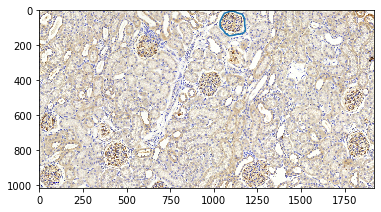

In [0]:
#superimpose on the original img
plt.imshow(img)
plt.plot(x,y)

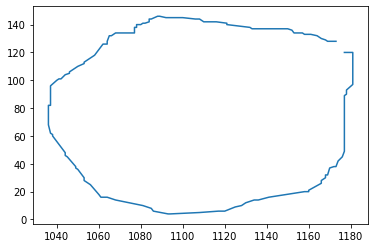

In [0]:
# plot alone => we see that the curve is not perfectly close. Might be a problem
plt.plot(x,y)

## Load a full ROI.zip

In [0]:
from read_roi import read_roi_zip

In [0]:
zip_name = 'RoiSetR22C1.zip'
zip_path = ROI_FOLDER+'/'+ zip_name 
zip_roi = read_roi_zip(zip_path)

read_roi_zip returns a dict of roi

In [0]:
zip_roi.keys()

odict_keys(['0075-1108', '0511-1796', '0770-1830', '0936-1239', '0209-0611', '0422-0972', '0829-0443'])

In [0]:
for key in zip_roi.keys():
  print(zip_roi[key].items())

dict_items([('type', 'freehand'), ('x', [1173, 1172, 1169, 1168, 1166, 1164, 1161, 1160, 1158, 1157, 1153, 1152, 1150, 1146, 1138, 1137, 1134, 1133, 1132, 1121, 1121, 1116, 1112, 1110, 1108, 1106, 1100, 1097, 1096, 1093, 1092, 1089, 1088, 1085, 1084, 1084, 1082, 1081, 1080, 1078, 1078, 1077, 1077, 1077, 1076, 1074, 1073, 1072, 1070, 1069, 1068, 1066, 1065, 1064, 1064, 1062, 1058, 1057, 1053, 1053, 1050, 1048, 1046, 1046, 1044, 1042, 1041, 1040, 1037, 1037, 1037, 1037, 1037, 1037, 1037, 1037, 1037, 1036, 1036, 1036, 1036, 1036, 1036, 1037, 1038, 1038, 1042, 1044, 1044, 1045, 1049, 1049, 1050, 1053, 1053, 1053, 1056, 1060, 1061, 1062, 1064, 1068, 1081, 1085, 1086, 1093, 1094, 1108, 1117, 1118, 1120, 1125, 1128, 1130, 1134, 1136, 1141, 1158, 1160, 1160, 1166, 1166, 1168, 1168, 1169, 1170, 1172, 1173, 1174, 1176, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1177, 1178, 1178, 1178, 1181, 1181, 1181, 1181, 1181, 1181, 1181, 1181, 1181,

In [0]:
def load_zip_roi(zip_path):
  output = []
  zip_roi = read_roi_zip(zip_path)
  for name in zip_roi.keys():
    x = zip_roi[name]['x']
    y = zip_roi[name]['y']
    output.append([name,x,y])
  return output

In [0]:
roi_list = load_zip_roi(zip_path)

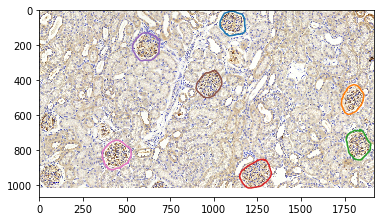

In [0]:
plt.imshow(img)
for roi in roi_list:
  plt.plot(roi[1],roi[2])

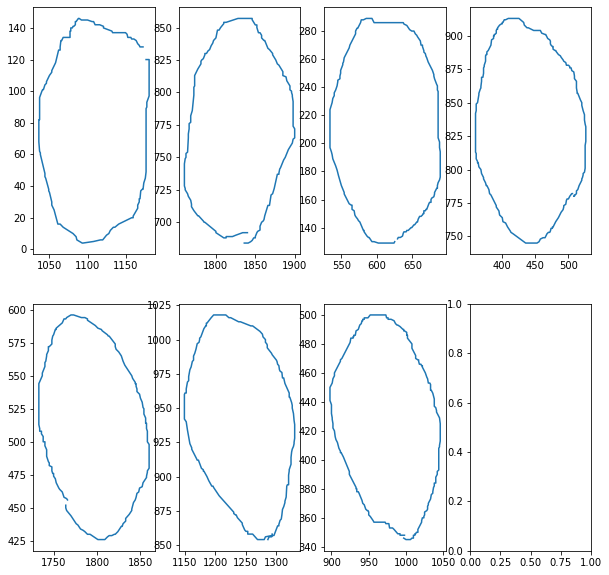

In [62]:
fig,ax = plt.subplots(2,4,figsize=(10,10))
for i, roi in enumerate(roi_list):
  ax[i%2,i//2].plot(roi[1],roi[2])

In [0]:
# pour le futur ...
# pour une itération systématiques des dossiers
from pathlib import Path
list(ROI_FOLDER.glob('*'))